In [1]:
#PHY 80 W23
#Lab 11: The Central Limit Theorem and Experimental Uncertainties (14/02/23)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import binom, poisson, norm

### 11.1

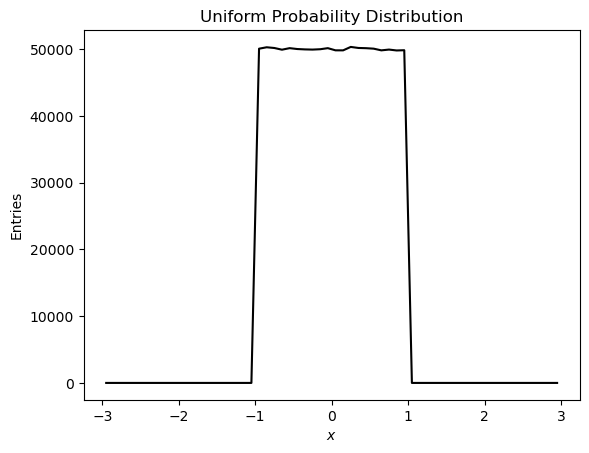

In [2]:
NEXP = 1000000
NBINS = 60
MIN = -3
MAX = 3
r = np.random.uniform(low=-1.0, high=1.0, size=NEXP)
h, edges = np.histogram(r,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "k-")
plt.xlabel("$x$")
plt.ylabel("Entries")
plt.title("Uniform Probability Distribution")
plt.show()

### 11.2

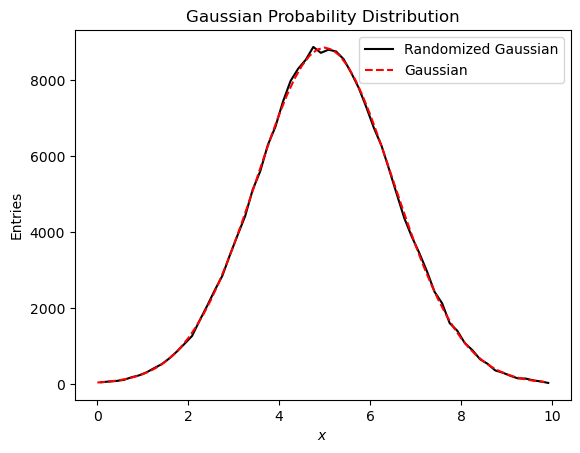

In [3]:
NEXP = 200000
NBINS = 60
MIN = 0
MAX = 10
r = np.random.normal(loc=5.0, scale=1.5, size=NEXP)
h, edges = np.histogram(r,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "k-", label="Randomized Gaussian")

xpred = edges[:-1]
ypred = NEXP*(MAX-MIN)/NBINS * norm.pdf(xpred, loc=np.mean(r), scale=np.sqrt(np.var(r)))
plt.plot(xpred, ypred, "r--", label="Gaussian")

plt.xlabel("$x$")
plt.ylabel("Entries")
plt.title("Gaussian Probability Distribution")
plt.legend()
plt.show()

### 11.3

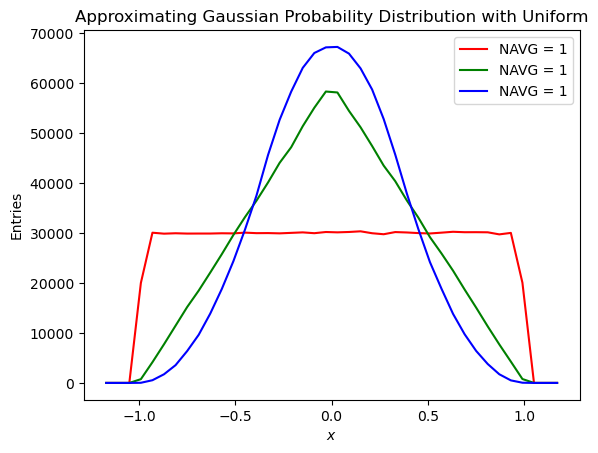

In [4]:
NEXP = 1000000
NBINS = 40
MIN = -1.2
MAX = 1.2

NAVG = 1
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,NAVG))
x = np.sum(r, axis=1)/float(NAVG)
h, edges = np.histogram(x,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "r-", label="NAVG = 1")

NAVG = 2
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,NAVG))
x = np.sum(r, axis=1)/float(NAVG)
h, edges = np.histogram(x,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "g-", label="NAVG = 1")

NAVG = 3
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,NAVG))
x = np.sum(r, axis=1)/float(NAVG)
h, edges = np.histogram(x,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "b-", label="NAVG = 1")

plt.xlabel("$x$")
plt.ylabel("Entries")
plt.title("Approximating Gaussian Probability Distribution with Uniform")
plt.legend()
plt.show()

### 11.4

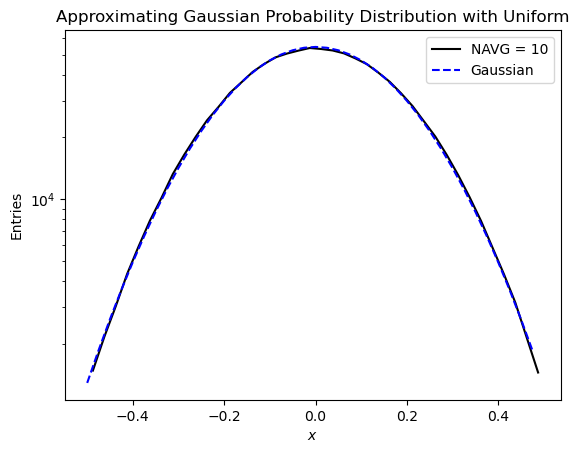

In [5]:
NEXP = 1000000
NBINS = 40
MIN = -0.5
MAX = 0.5

NAVG = 10
r = np.random.uniform(low=-1.0, high=1.0, size=(NEXP,NAVG))
x = np.sum(r, axis=1)/float(NAVG)
h, edges = np.histogram(x,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "k-", label="NAVG = 10")

xpred = edges[:-1]
ypred = NEXP/NBINS * norm.pdf(xpred, loc=np.mean(x), scale=np.sqrt(np.var(x)))
plt.plot(xpred, ypred, "b--", label="Gaussian")

plt.xlabel("$x$")
plt.ylabel("Entries")
plt.yscale("log")
plt.title("Approximating Gaussian Probability Distribution with Uniform")
plt.legend()
plt.show()

### 11.5

In [6]:
a = 12
sigma_a = 5
b = 8
sigma_b = 2
print("The expected value of c is ", a - b)
print("The expected value of sigma_c is ", np.round(np.sqrt((sigma_a)**2 + (sigma_b)**2),2))

The expected value of c is  4
The expected value of sigma_c is  5.39


### 11.6

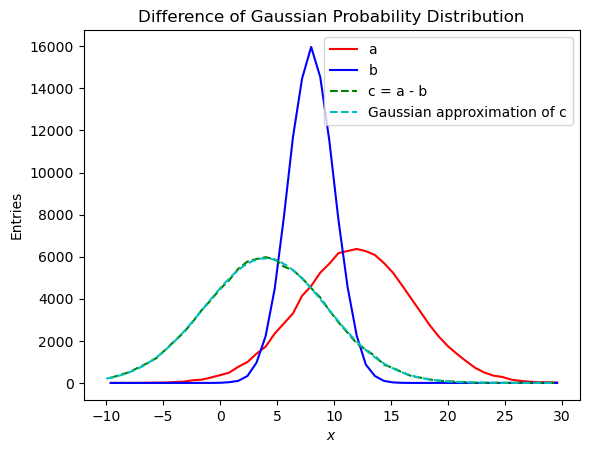

The measured value of c is  3.99
The measured value of sigma_c is  5.39


In [7]:
NEXP = 100000
NBINS = 50
MIN = -10
MAX = 30

a_gaussian = np.random.normal(loc=a, scale=sigma_a, size=NEXP)
h, edges = np.histogram(a_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "r-", label="a")

b_gaussian = np.random.normal(loc=b, scale=sigma_b, size=NEXP)
h, edges = np.histogram(b_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "b-", label="b")

c_gaussian = a_gaussian - b_gaussian
h, edges = np.histogram(c_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "g--", label="c = a - b")

xpred = edges[:-1]
ypred = NEXP*(MAX-MIN)/NBINS * norm.pdf(xpred, loc=np.mean(a-b), scale=np.sqrt((sigma_a)**2 + (sigma_b)**2))
plt.plot(xpred, ypred, "c--", label="Gaussian approximation of c")

plt.xlabel("$x$")
plt.ylabel("Entries")
plt.title("Difference of Gaussian Probability Distribution")
plt.legend()
plt.show()

print("The measured value of c is ", round(np.mean(c_gaussian),2))
print("The measured value of sigma_c is ", round(np.sqrt(np.var(c_gaussian)),2))
#the measured values for c and sigma_c are fairly close,
#and c fits the gaussian distribution with the calculated mean and sigma

### 11.7

In [8]:
a = 10
sigma_a = 2
b = 4
sigma_b = 1
print("The expected value of c is ", a / b)
print("The expected value of sigma_c is ", np.round((a/b)*np.sqrt((sigma_a/a)**2 + (sigma_b/b)**2),2))

The expected value of c is  2.5
The expected value of sigma_c is  0.8


### 11.8

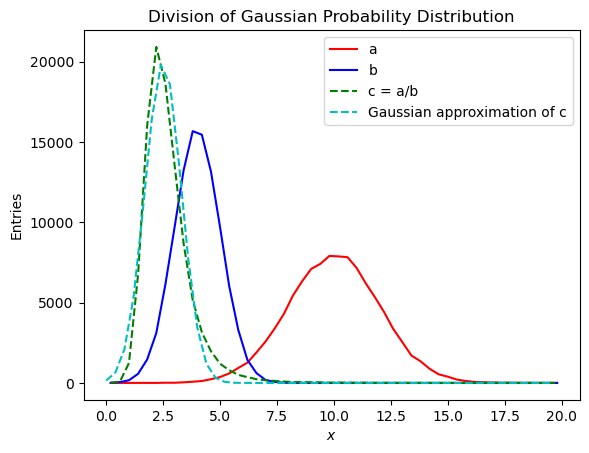

The measured value of c is  2.7
The measured value of sigma_c is  1.19


In [9]:
NEXP = 100000
NBINS = 50
MIN = 0
MAX = 20

a_gaussian = np.random.normal(loc=a, scale=sigma_a, size=NEXP)
h, edges = np.histogram(a_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "r-", label="a")

b_gaussian = np.random.normal(loc=b, scale=sigma_b, size=NEXP)
h, edges = np.histogram(b_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "b-", label="b")

c_gaussian = a_gaussian / b_gaussian
h, edges = np.histogram(c_gaussian,bins=NBINS,range=(MIN, MAX))
cbins = (edges[:-1] + edges[1:])/2.0
plt.plot(cbins, h, "g--", label="c = a/b")

xpred = edges[:-1]
ypred = NEXP*(MAX-MIN)/NBINS * norm.pdf(xpred, loc=np.mean(a/b), scale=(a/b)*np.sqrt((sigma_a/a)**2 + (sigma_b/b)**2))
plt.plot(xpred, ypred, "c--", label="Gaussian approximation of c")

plt.xlabel("$x$")
plt.ylabel("Entries")
plt.title("Division of Gaussian Probability Distribution")
plt.legend()
plt.show()

print("The measured value of c is ", round(np.mean(c_gaussian),2))
print("The measured value of sigma_c is ", round(np.sqrt(np.var(c_gaussian)),2))
#although c is close to a gaussian distribution with the calculated mean and sigma,
#the mean and variance of c are off from the expected values,
#likely due to several outliers from the number of experiments done as with division,
#outliers are more magnified (9.99-0.01=9.98) vs (9.99/0.01=999)

### 11.9

$P(x) = {\begin{cases}{\frac {1}{b-a}}&{\text{for }}x\in [a,b]\\0&{\text{otherwise}}\end{cases}}$

$\langle x \rangle = \int_{-\infty}^{\infty} xP(x) \, dx$

$\langle x \rangle = \int_{a}^{b} x\frac {1}{b-a} \, dx$

$\langle x \rangle = \frac {1}{b-a}\left.\frac{x^2}{2}\right\vert_{a}^{b}$

$\langle x \rangle = \frac {1}{b-a}\frac{b^2-a^2}{2}$

$\langle x \rangle = \frac {b+a}{2}$

$\langle x^2 \rangle = \int_{-\infty}^{\infty} x^2P(x) \, dx$

$\langle x^2 \rangle = \int_{a}^{b} x^2\frac {1}{b-a} \, dx$

$\langle x^2 \rangle = \frac {1}{b-a}\left.\frac{x^3}{3}\right\vert_{a}^{b}$

$\langle x^2 \rangle = \frac {1}{b-a}\frac{b^3-a^3}{3}$

$\langle x^2 \rangle = \frac {b^2+ab+a^2}{3}$

$\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2$

$\sigma^2 = \frac {b^2+ab+a^2}{3} - (\frac {b+a}{2})^2$

$\sigma^2 = \frac {4b^2+4ab+4a^2}{12} - \frac {3b^2+6ab+3a^2}{12}$

$\sigma^2 = \frac {b^2-2ab+a^2}{12}$

$\sigma^2 = \frac {(b-a)^2}{12}$

### 11.10

By the central limit theorem, the distribution of the sample means will be approximately normally distributed. The variance of the Gaussian distribution in 11.4 should then be equal to the variance of the uniform distribution divided by the the number of samples taken. The variance of the original uniform distribution is $\frac{(1--1)^2}{12} = \frac{1}{3}$. The variance of the Gaussian should be $\frac{\frac{1}{3}}{10} = \frac{1}{30}$. The mean of both the uniform and Gaussian distributions should be $0$.

In [10]:
print("variance of uniform distribution:", round(np.var(r),2))
print("variance of gaussian distribution:", round(np.var(x),2))
print("mean of uniform distribution:", round(np.mean(r),2))
print("mean of gaussian distribution:", round(np.mean(x),2))
#these values are reasonably close to the expected values

variance of uniform distribution: 0.33
variance of gaussian distribution: 0.03
mean of uniform distribution: -0.0
mean of gaussian distribution: -0.0
